In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
file_path = r'C:\Users\maruf\PycharmProjects\All\project\fastfood.csv'  
df = pd.read_csv(file_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   515 non-null    int64  
 1   restaurant   515 non-null    object 
 2   item         515 non-null    object 
 3   calories     515 non-null    int64  
 4   cal_fat      515 non-null    int64  
 5   total_fat    515 non-null    int64  
 6   sat_fat      515 non-null    float64
 7   trans_fat    515 non-null    float64
 8   cholesterol  515 non-null    int64  
 9   sodium       515 non-null    int64  
 10  total_carb   515 non-null    int64  
 11  fiber        503 non-null    float64
 12  sugar        515 non-null    int64  
 13  protein      514 non-null    float64
 14  vit_a        301 non-null    float64
 15  vit_c        305 non-null    float64
 16  calcium      305 non-null    float64
 17  salad        515 non-null    object 
dtypes: float64(7), int64(8), object(3)
memory usage: 7

In [3]:
# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [4]:
# Summary statistics of numerical columns
print(df.describe())

       Unnamed: 0     calories      cal_fat   total_fat     sat_fat  \
count  515.000000   515.000000   515.000000  515.000000  515.000000   
mean   258.000000   530.912621   238.813592   26.590291    8.153398   
std    148.811962   282.436147   166.407510   18.411876    6.418811   
min      1.000000    20.000000     0.000000    0.000000    0.000000   
25%    129.500000   330.000000   120.000000   14.000000    4.000000   
50%    258.000000   490.000000   210.000000   23.000000    7.000000   
75%    386.500000   690.000000   310.000000   35.000000   11.000000   
max    515.000000  2430.000000  1270.000000  141.000000   47.000000   

        trans_fat  cholesterol       sodium  total_carb       fiber  \
count  515.000000   515.000000   515.000000  515.000000  503.000000   
mean     0.465049    72.456311  1246.737864   45.664078    4.137177   
std      0.839644    63.160406   689.954278   24.883342    3.037460   
min      0.000000     0.000000    15.000000    0.000000    0.000000   
25%  

Data Cleaning: Clean the data by addressing missing values, outliers, inconsistencies, and errors. This step ensures that the data is accurate and reliable for analysis.

In [5]:
# Rename the "Unnamed" column to a new name
new_column_name = 'SL'
df.rename(columns={'Unnamed: 0': new_column_name}, inplace=True)


# Handling missing values
# Replace missing values in vit_a, vit_c, and calcium with appropriate values (e.g., 0 or mean)
df['vit_a'].fillna(df['vit_a'].mean(), inplace=True)  # Replace with 0 for missing vitamin A values
df['vit_c'].fillna(df['vit_c'].mean(), inplace=True)  # Replace with 0 for missing vitamin C values
df['calcium'].fillna(df['calcium'].mean(), inplace=True)  # Replace with mean for missing calcium values



# Calculate the mean of non-zero values in the 'trans_fat' column
trans_fat_mean = df[df['trans_fat'] != 0]['trans_fat'].mean()

# Replace 0 values in 'trans_fat' with the calculated mean
df.loc[df['trans_fat'] == 0, 'trans_fat'] = trans_fat_mean


# Calculate the mean of non-zero values in the specified columns
cal_fat_mean = df[df['cal_fat'] != 0]['cal_fat'].mean()
total_fat_mean = df[df['total_fat'] != 0]['total_fat'].mean()
sat_fat_mean = df[df['sat_fat'] != 0]['sat_fat'].mean()
cholesterol_mean = df[df['cholesterol'] != 0]['cholesterol'].mean()
total_carb_mean = df[df['total_carb'] != 0]['total_carb'].mean()
fiber_mean = df[df['fiber'] != 0]['fiber'].mean()
sugar_mean = df[df['sugar'] != 0]['sugar'].mean()
vit_a_mean = df[df['vit_a'] != 0]['vit_a'].mean()
calcium_mean = df[df['calcium'] != 0]['calcium'].mean()
vit_c_mean = df[df['vit_c'] != 0]['vit_c'].mean()


# Replace 0 values in the specified columns with their respective means
df.loc[df['cal_fat'] == 0, 'cal_fat'] = cal_fat_mean
df.loc[df['total_fat'] == 0, 'total_fat'] = total_fat_mean
df.loc[df['sat_fat'] == 0, 'sat_fat'] = sat_fat_mean
df.loc[df['cholesterol'] == 0, 'cholesterol'] = cholesterol_mean
df.loc[df['total_carb'] == 0, 'total_carb'] = total_carb_mean
df.loc[df['fiber'] == 0, 'fiber'] = fiber_mean
df.loc[df['sugar'] == 0, 'sugar'] = sugar_mean
df.loc[df['vit_a'] == 0, 'vit_a'] = vit_a_mean
df.loc[df['calcium'] == 0, 'calcium'] = calcium_mean
df.loc[df['vit_c'] == 0, 'vit_c'] = vit_c_mean


# Save the DataFrame with replaced values to a new CSV file
cleaned_file_path = r'C:\Users\maruf\PycharmProjects\All\project\fastfood_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)


# Load the CSV file into a pandas DataFrame
file_path = r'C:\Users\maruf\PycharmProjects\All\project\fastfood_cleaned.csv'
df = pd.read_csv(file_path)

Nutritional Composition Comparison: Compare the nutritional composition of different restaurants or items. For example, you could compare the average calories, fat content, protein, or vitamins between different restaurants.

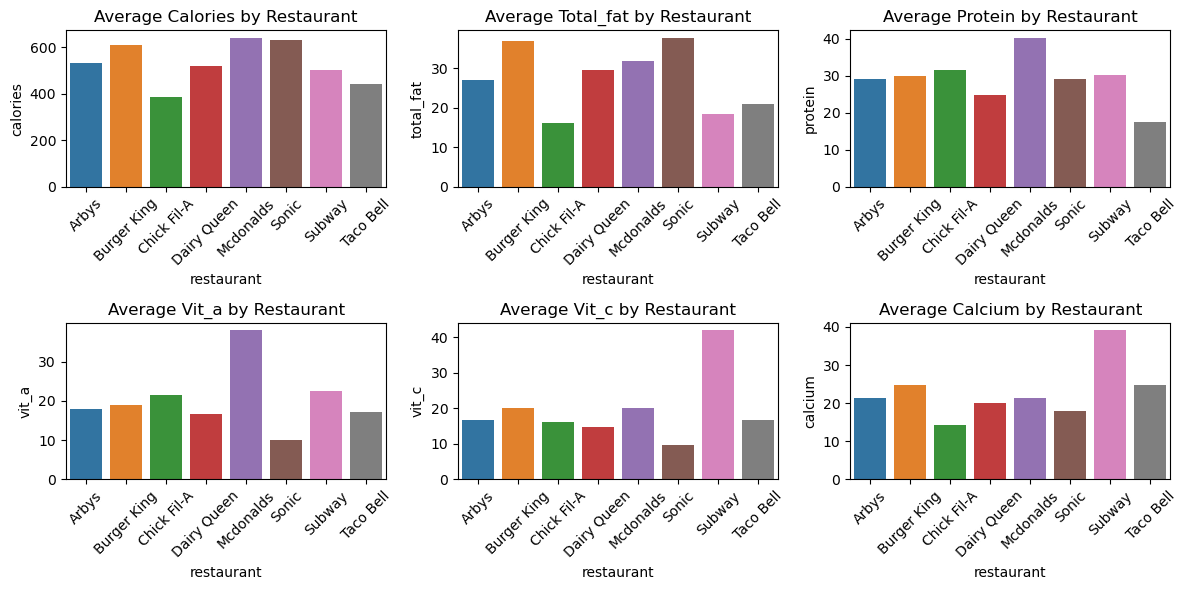

In [6]:
# Nutritional components to compare
components = ['calories', 'total_fat', 'protein', 'vit_a', 'vit_c', 'calcium']

# Group data by 'restaurant' and calculate average nutritional values for selected components
restaurant_avg = df.groupby('restaurant')[components].mean()

# Plotting comparisons using seaborn
plt.figure(figsize=(12, 6))

# Loop through each component and create subplots
for i, component in enumerate(components, start=1):
    plt.subplot(2, 3, i)
    sns.barplot(data=restaurant_avg, x=restaurant_avg.index, y=component)
    plt.title(f'Average {component.capitalize()} by Restaurant')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Restaurant Comparison: Rank restaurants based on their average nutritional values. This could help consumers make informed decisions about where to eat.

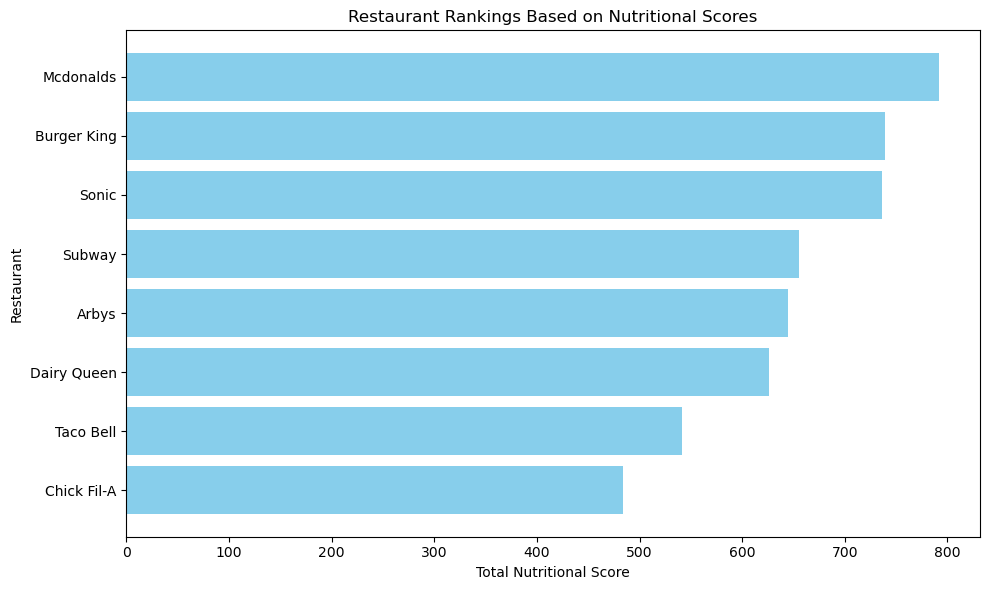

In [7]:
# Nutritional components to consider for ranking
nutritional_components = ['calories', 'total_fat', 'protein', 'vit_a', 'vit_c', 'calcium']

# Calculate the average nutritional values for each restaurant
restaurant_avg = df.groupby('restaurant')[nutritional_components].mean()

# Calculate a total score for each restaurant
restaurant_avg['total_score'] = restaurant_avg[nutritional_components].sum(axis=1)

# Rank the restaurants based on their total scores
ranked_restaurants = restaurant_avg.sort_values(by='total_score', ascending=False)

# Create a bar plot to visualize the ranked restaurants
plt.figure(figsize=(10, 6))
plt.barh(ranked_restaurants.index, ranked_restaurants['total_score'], color='skyblue')
plt.xlabel('Total Nutritional Score')
plt.ylabel('Restaurant')
plt.title('Restaurant Rankings Based on Nutritional Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.tight_layout()
plt.show()


Healthier Options: Define criteria for "healthier" fast food items (e.g., low calorie, low fat, high protein) and identify which restaurants and items meet those criteria.

      restaurant                                    item  calories  total_fat  \
15     Mcdonalds                            Lobster Roll       290        5.0   
49     Mcdonalds  Premium Asian Salad w/ Grilled Chicken       270        9.0   
66   Chick Fil-A                 6 piece Chicken Nuggets       190        9.0   
74   Chick Fil-A         8 piece Grilled Chicken Nuggets       140        4.0   
75   Chick Fil-A        12 Piece Grilled Chicken Nuggets       210        5.0   
299  Dairy Queen     Grilled Chicken Garden Greens Salad       150        2.0   
378       Subway                    Double Chicken Salad       220        5.0   

     protein  
15      24.0  
49      31.0  
66      21.0  
74      25.0  
75      38.0  
299     23.0  
378     36.0  


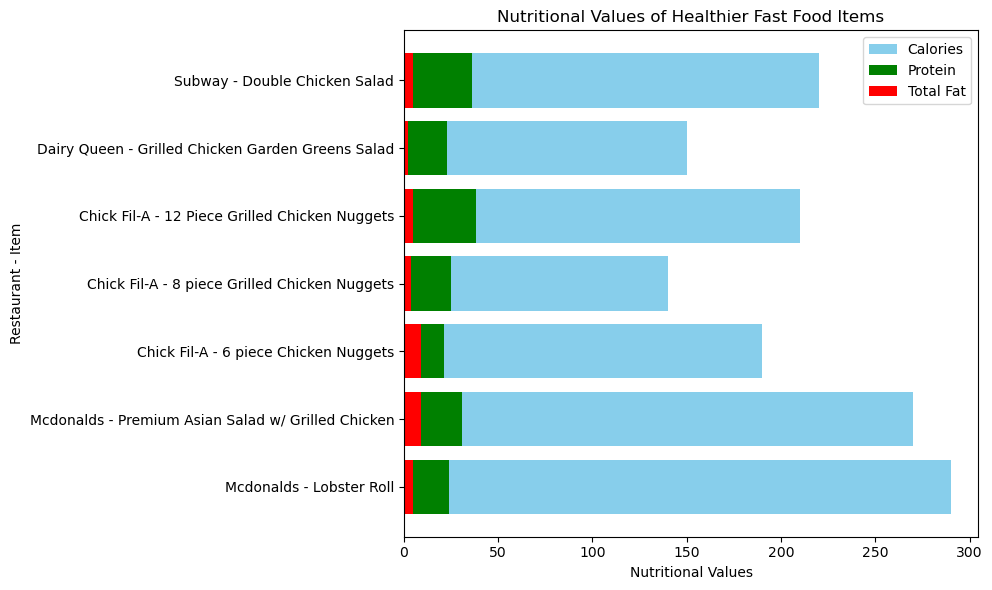

In [8]:
# Define criteria for healthier items
low_calories = 300  # Example: items with calories less than 300 are considered low-calorie
low_total_fat = 10  # Example: items with total fat less than 10 grams are considered low-fat
high_protein = 20   # Example: items with protein greater than 20 grams are considered high-protein

# Filter the DataFrame based on the defined criteria
healthier_items = df[(df['calories'] < low_calories) &
                     (df['total_fat'] < low_total_fat) &
                     (df['protein'] > high_protein)]

# Display the restaurants and items that meet the criteria
print(healthier_items[['restaurant', 'item', 'calories', 'total_fat', 'protein']])

# Create y-axis labels with restaurant names and item names
y_labels = [f"{restaurant} - {item}" for restaurant, item in zip(healthier_items['restaurant'], healthier_items['item'])]

# Plotting comparisons using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(y_labels, healthier_items['calories'], color='skyblue', label='Calories')
plt.barh(y_labels, healthier_items['protein'], color='green', label='Protein')
plt.barh(y_labels, healthier_items['total_fat'], color='red', label='Total Fat')
plt.xlabel('Nutritional Values')
plt.ylabel('Restaurant - Item')
plt.title('Nutritional Values of Healthier Fast Food Items')
plt.legend()
plt.tight_layout()
plt.show()


Visualizations: Create various visualizations like histograms, scatter plots, bar charts, and box plots to visualize the distribution of nutritional values and identify any trends or outliers.

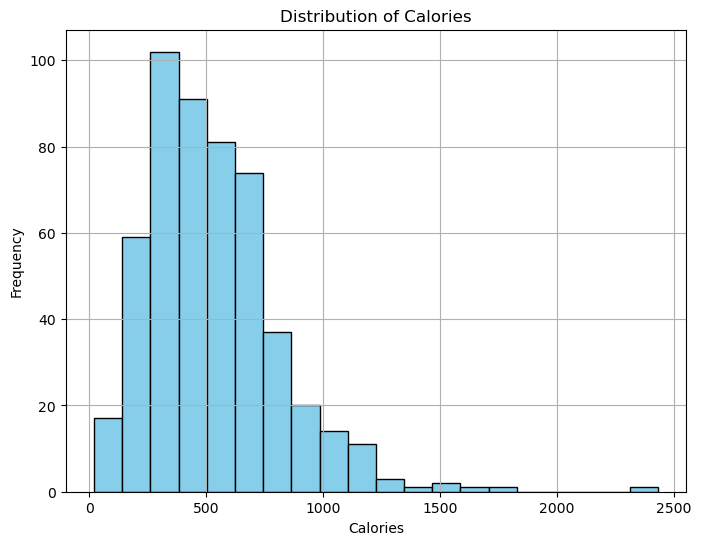

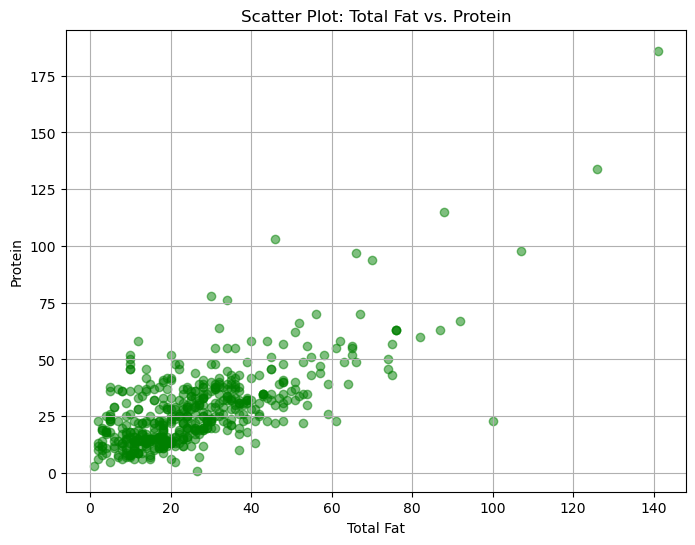

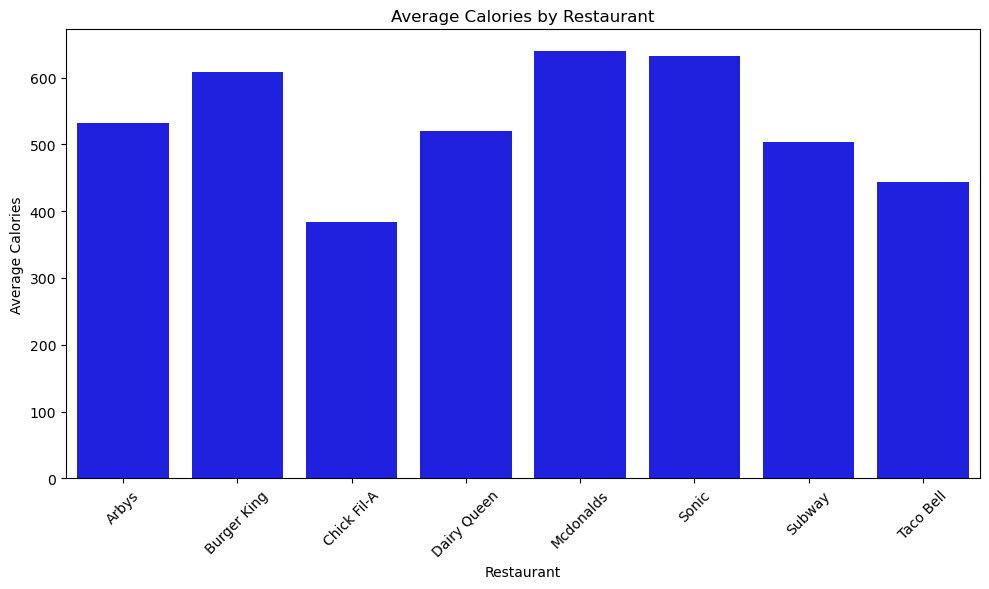

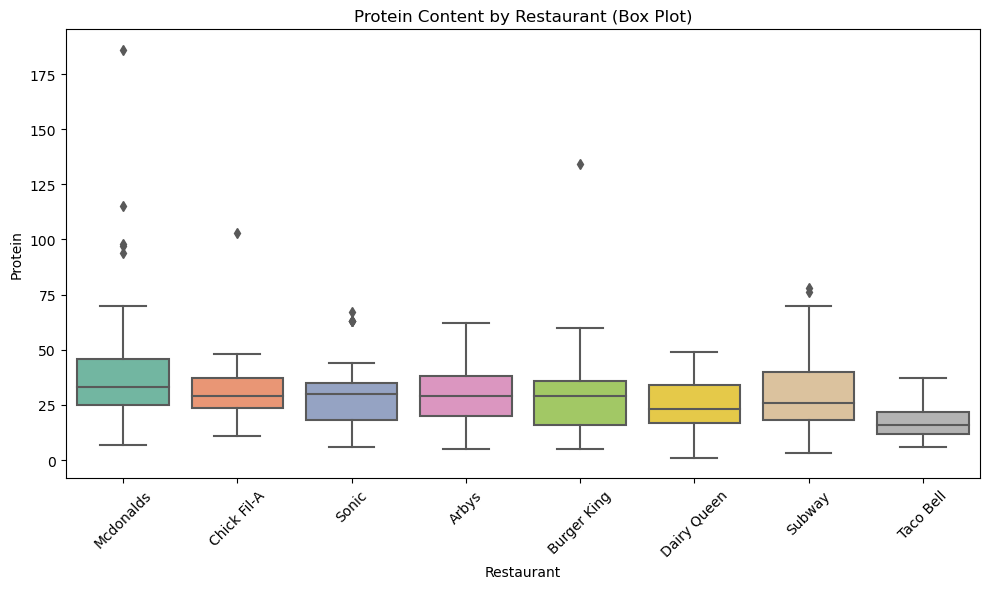

In [9]:
# Define criteria for healthier items
low_calories = 300  # Example: items with calories less than 300 are considered low-calorie
low_total_fat = 10  # Example: items with total fat less than 10 grams are considered low-fat
high_protein = 20   # Example: items with protein greater than 20 grams are considered high-protein

# Filter the DataFrame based on the defined criteria
healthier_items = df[(df['calories'] < low_calories) &
                     (df['total_fat'] < low_total_fat) &
                     (df['protein'] > high_protein)]

# Visualizations

# Histogram for Calories
plt.figure(figsize=(8, 6))
plt.hist(df['calories'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.grid(True)
plt.show()

# Scatter Plot for Total Fat vs. Protein
plt.figure(figsize=(8, 6))
plt.scatter(df['total_fat'], df['protein'], color='green', alpha=0.5)
plt.xlabel('Total Fat')
plt.ylabel('Protein')
plt.title('Scatter Plot: Total Fat vs. Protein')
plt.grid(True)
plt.show()

# Bar Chart for Average Calories by Restaurant
restaurant_avg_calories = df.groupby('restaurant')['calories'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=restaurant_avg_calories.index, y=restaurant_avg_calories.values, color='blue')
plt.xlabel('Restaurant')
plt.ylabel('Average Calories')
plt.title('Average Calories by Restaurant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot for Protein Content by Restaurant
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='restaurant', y='protein', palette='Set2')
plt.xlabel('Restaurant')
plt.ylabel('Protein')
plt.title('Protein Content by Restaurant (Box Plot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
